# Algotytm przecinania się odcinków na płaszczyźnie

In [1]:
import numpy as np
import pandas as pd
from bitalg.tests.test4 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [2]:
def draw_example_1():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))

    vis.add_line_segment(line_segments)
    vis.show()
    
def draw_example_2():
    # TODO narysowac to uzywając naszego narzędzia do wizualizacji
    vis = Visualizer()
    line_segments = ((-0.5, 0.5), (8.5, 3.5),
                     (1, 3), (7, 5),
                     (2, 4), (5, 1),
                     (4.5, 3), (6.5, 6),
                     (0, 5), (5.5, 5.5))
    points = [(4, 2),
              (2.5, 3.5),
              (5.5, 4.5)]

    vis.add_line_segment(line_segments)
    vis.add_point(points, color='red')
    vis.show()


### Wprowadzenie
Celem ćwiczenia jest implementacja i zapoznanie się z algorytmem wyznaczającym wszystkie przecięcia się odcinków na płaszczyźnie

### Przykładowy zbiór odcinków przed wyznaczeniem punktów przecięcia

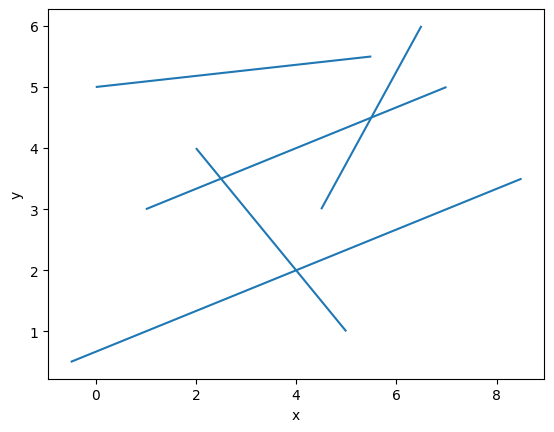

In [3]:
draw_example_1()

### Przykładowy zbiór odcinków po wyznaczenu punktów przecięcia

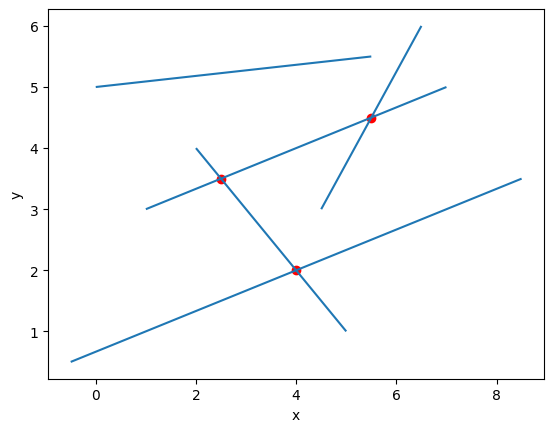

In [4]:
draw_example_2()

# Generowanie losowych odcinków na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_sections```

In [5]:
def generate_uniform_sections(max_x, max_y, n):
    """
    Funkcja generuje odcinki o współrzędnych rzeczywistych w postaci par punktów. 
    Żaden wygenerowany odcinek nie jest odcinkiem pionowym.
    Żadne dwa odcinki nie mają swoich końców o takiej samej współrzędnej x.
    Zakres współrzędnych: x -> (0, max_x), y -> (0, max_y)
    :param max_x: określa maksymalną wartość współrzednej x jaka może zostać wylosowana
    :param max_y: określa maksymalną wartość współrzednej y jaka może zostać wylosowana
    :param n: ilość generowanych odcinków
    :return: tablica odcinków w postaci krotek zawierających parę krotek współrzędnych punktów końcowych odcinków
    np. [((x1, y1), (x2, y2)), ((x3, y3), (x4, y4)),...]
    """
    x_cords = []
    y_cords = []
    i = 0
    while i < n:
        x1 = np.random.uniform(0,max_x)
        x2 = np.random.uniform(0,max_x)
        if x1 not in x_cords and x2 not in x_cords:
            x_cords.append((x1,x2))
            i += 1
    i = 0
    while i < n:
        y1 = np.random.uniform(0,max_y)
        y2 = np.random.uniform(0,max_y)

        if y1 not in y_cords and y2 not in y_cords:
            y_cords.append((y1,y2))
            i += 1
    sections = []
    for i in range(n):
        sections.append([(x_cords[i][0],y_cords[i][0]),(x_cords[i][1],y_cords[i][1])])
    return sections
    raise Exception("Unimplemented")

In [6]:
Test().runtest(1, generate_uniform_sections)

Lab 4, task 1:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 5.368s


<span style="color:red">Ćw.</span> Wygeneruj $\large20$ losowych odcinków w przestrzeni 2D o współrzędnych z przedziału $\large x \in \langle 0,1000 \rangle$ oraz $\large y \in \langle 0,1000\rangle$. 

In [7]:
section = generate_uniform_sections(1000,1000,20)
print(section)

[[(293.95228515804905, 191.3132804306892), (811.8022095169508, 519.1139270310055)], [(160.48503828788296, 543.9538138415727), (213.24189017793938, 969.362734093495)], [(769.2865775190558, 821.2719252234641), (127.23751381271697, 726.9257491409456)], [(87.62684385350062, 273.5503050852284), (236.6025045633108, 702.232216703285)], [(848.1408979394939, 726.7147562358871), (574.1876751785182, 185.45209911359262)], [(786.8108045444436, 778.9529811249276), (404.26069779213805, 653.3959763113744)], [(815.8802997743645, 538.5433944708337), (222.0360433808103, 966.6045655386133)], [(260.4015719109911, 580.3446605450074), (730.2417518717965, 636.3488398214304)], [(623.003965167732, 178.93427522799422), (664.4577577526084, 276.64814573084163)], [(732.9122993670683, 248.91731219379608), (304.21057302506125, 550.7055227690438)], [(537.9305723690543, 216.51727106969454), (78.32624756270556, 594.6005300698055)], [(574.3512758193361, 374.96242961058334), (869.0776842524897, 308.1710060632473)], [(120.

Zwizualizuj otrzymane odcinki

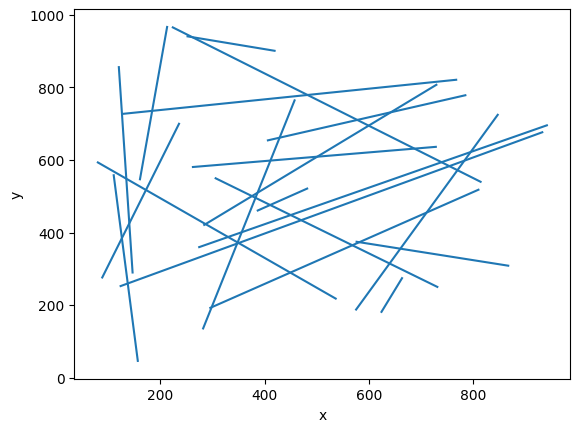

In [8]:
# ...
vis = Visualizer()
vis.add_line_segment(section)
vis.show()

Uzupełnij funkcję ```add_sections``` #interaktywne dodawanie odcinków przez rysowanie myszką (jak?) TODO

In [10]:
%matplotlib tk
from matplotlib.backend_bases import MouseButton
import matplotlib.pyplot as plt

def add_sections(sections):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 100)
    ax.set_ylim(0, 100)
    ax.scatter([], [])

    def draw_section(section):
        for i in range(len(section) - 1):
            ax.plot([section[i][0], section[i+1][0]], [section[i][1], section[i+1][1]], color='blue')

    for section in sections:
        draw_section(section)

    new_section = []  

    def on_click(event):
        nonlocal new_section
        if event.button is MouseButton.LEFT and event.inaxes:
            new_section.append((event.xdata, event.ydata))
            if len(new_section) == 2:
                sections.append(new_section[:])  
                ax.plot([new_section[0][0], new_section[1][0]], [new_section[0][1], new_section[1][1]], color='blue')
                new_section = []
                plt.draw()

    plt.connect("button_press_event", on_click)


Uzupełnij funkcję ```is_intersection```

In [11]:

def det(a,b,c):
    return a[0]*b[1] + a[1]*c[0] + b[0]*c[1] - b[1]*c[0] - a[1]*b[0] - a[0]*c[1]
def orient(a,b,c,eps=0):
    val = det(a,b,c)
    if abs(val)<=eps:    
        return 0
    elif val>eps:
        return 1
    else:
        return -1

In [13]:
def on_segment(p, q, r):
    if (q[0] <= max(p[0], r[0]) and q[0] >= min(p[0], r[0]) and q[1] <= max(p[1], r[1]) and q[1] >= min(p[1], r[1])):
        return True
    return False

def do_intersect(segment1, segment2):
    p1, q1 = segment1
    p2, q2 = segment2

    o1 = orient(p1, q1, p2)
    o2 = orient(p1, q1, q2)
    o3 = orient(p2, q2, p1)
    o4 = orient(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True

    if o1 == 0 and on_segment(p1, p2, q1):
        return True

    if o2 == 0 and on_segment(p1, q2, q1):
        return True

    if o3 == 0 and on_segment(p2, p1, q2):
        return True

    if o4 == 0 and on_segment(p2, q1, q2):
        return True

    return False

In [14]:
def is_intersection(sections):
    def calculate_y(seg, x):
        start_point = seg[0]
        end_point = seg[1]
        x1, y1 = start_point
        x2, y2 = end_point
        
        if x1 != x2:
            m = (y2 - y1) / (x2 - x1)
            c = y1 - m * x1
            return m * x + c
        return float('inf')
    def put_in(sec,ind):
        if len(active) == 0:
            active.append((sec,ind))
        else:
            i = 0
            while i < len(active) and sec[0][1] > calculate_y(active[i][0],sec[0][0]):
                i += 1
            active.insert(i,(sec,ind))
    
    events = []
    for idx, segment in enumerate(sections):
        events.append((segment[0], 'left', idx))
        events.append((segment[1], 'right', idx))
    events.sort(key=lambda x: x[0][0])
    active = []
    while events:
        point, case, idx = events.pop(0)
        if case == 'left':
            put_in(sections[idx],idx)
        elif case == 'right':
            active.pop(active.index((sections[idx], idx)))
            
        for i in range(len(active) - 1):
            n1, ind1 = active[i]
            n2, ind2 = active[i + 1]
            if do_intersect(n1, n2):
                return True
            
    return False


In [20]:
t = []
add_sections(t)
print(t)

[]


In [15]:
Test().runtest(2, is_intersection)
print(is_intersection(t))

Lab 4, task 2:
	Test 1: Passed
	Test 2: Passed
	Test 3: Passed
Result: 3/3
Time: 0.003s
False


### W jaki sposób zaimplementowałeś struktura stanu (stan miotły) oraz struktura zdarzeń w Twoim programie?

zdarzenia - lista
stan miotły - zbiór

Uzupełnij funkcję ```is_intersection_with_visualization```

In [18]:
def is_intersection_with_visualization(sections): # TODO wizualizacja (jak?)
    """
    Funkcja sprawdza czy jakakolwiek para podanych odcinków się przecina i dodatkowo zwraca kolejne kroki w wizualizacji 
    :param sections: tablica odcinków w postaci krotek ktorek współrzędnych punktów końcowych odcinków
    :return: True / False
    """
    
    miny = min(min(point[1] for point in segment) for segment in sections)
    maxy = max(max(point[1] for point in segment) for segment in sections)
    vis = Visualizer()
    vis.add_line_segment(sections)
    def calculate_y(seg, x):
        start_point = seg[0]
        end_point = seg[1]
        x1, y1 = start_point
        x2, y2 = end_point
        
        if x1 != x2:
            m = (y2 - y1) / (x2 - x1)
            c = y1 - m * x1
            return m * x + c
        return float('inf')
    def put_in(sec,ind):
        if len(active) == 0:
            active.append((sec,ind))
        else:
            i = 0
            while i < len(active) and sec[0][1] > calculate_y(active[i][0],sec[0][0]):
                i += 1
            active.insert(i,(sec,ind))
    
    events = []
    for idx, segment in enumerate(sections):
        events.append((segment[0], 'left', idx,vis.add_point(segment[0],color='orange')))
        events.append((segment[1], 'right', idx,vis.add_point(segment[1],color='green')))
    events.sort(key=lambda x: x[0][0])
    active = []
    while events:
        point, case, idx,_ = events.pop(0)
        broom = vis.add_line_segment(((point[0],miny),(point[0],maxy)),color='black')
        if case == 'left':
            put_in(sections[idx],idx)
        elif case == 'right':
            active.pop(active.index((sections[idx], idx)))
            
        for i in range(len(active) - 1):
            n1, ind1 = active[i]
            n2, ind2 = active[i + 1]
            a = vis.add_line_segment(n1,color='purple')
            b = vis.add_line_segment(n2,color='purple')
            if do_intersect(n1, n2):
                vis.add_line_segment(n1,color='red')
                vis.add_line_segment(n2,color='red')
                return True,vis
            vis.remove_figure(a)
            vis.remove_figure(b)
        vis.remove_figure(broom)
            
    return False,vis

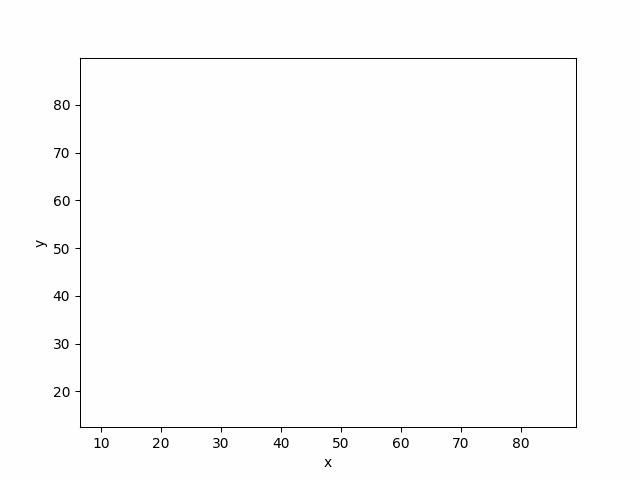

In [21]:
_,vis = is_intersection_with_visualization(t)
vis.show_gif()

Uzupełnij funkcję ```find_intersections```

In [ ]:
def find_intersections(sections):
    def calculate_y(seg, x):
        start_point = seg[0]
        end_point = seg[1]
        x1, y1 = start_point
        x2, y2 = end_point
        
        if x1 != x2:
            m = (y2 - y1) / (x2 - x1)
            c = y1 - m * x1
            return m * x + c
        return float('inf')
    def put_in(sec,ind):
        if len(active) == 0:
            active.append((sec,ind))
        else:
            i = 0
            while i < len(active) and sec[0][1] > calculate_y(active[i][0],sec[0][0]):
                i += 1
            active.insert(i,(sec,ind))
    def compute_intersection(seg1, seg2):
        x1, y1 = seg1[0]
        x2, y2 = seg1[1]
        x3, y3 = seg2[0]
        x4, y4 = seg2[1]

        px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / ((x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4))
        py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / ((x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4))

        return px, py
    
    events = []
    for idx, segment in enumerate(sections):
        events.append((segment[0], 'left', idx))
        events.append((segment[1], 'right', idx))
    events.sort(key=lambda x: x[0][0])
    active = []
    intersections = set()
    ints = set()
    while events:
        point, case, idx = events.pop(0)
        if case == 'left':
            put_in(sections[idx],idx)
        elif case == 'right':
            active.pop(active.index((sections[idx], idx)))
        else:
            case = case.split(' ')
            ind2 = int(case[0])
            ind1 = int(case[1])
            intersections.add((compute_intersection(sections[ind2], sections[ind1]), ind1+1, ind2+1))
            active[active.index((sections[ind1], ind1))], active[active.index((sections[ind2], ind2))] = active[active.index((sections[ind2], ind2))], active[active.index((sections[ind1], ind1))]
            
        for i in range(len(active) - 1):
            n1, ind1 = active[i]
            n2, ind2 = active[i + 1]
            if do_intersect(n1, n2) and compute_intersection(n1, n2)[0] - point[0] > 0 and compute_intersection(n1, n2) not in ints:
                events.append((compute_intersection(n1, n2), str(ind1) + ' ' + str(ind2), None))
                events.sort(key=lambda x: x[0][0])
                ints.add(compute_intersection(n1, n2))
            
    return list(intersections)


In [ ]:
Test().runtest(3, find_intersections)
#znajduje poprawne punkty tylko przez niedokładność obliczeń i kolejność dodawania testy nie wypisują passed

Lab 4, task 3:
	Test 1: WRONG ANSWER
		Output:   [((-0.0016743790516658113, -0.0072635868329410744), 1, 2), ((0.011860591253227503, -0.018140143229495424), 3, 1), ((0.01152607474025421, 0.006132801296422437), 3, 2), ((0.02265867063122986, -0.02681736354721218), 4, 1), ((0.0223444511307787, 0.01711175484919488), 4, 2)]
		Expected: ['-0.0016743790516658117 -0.007263586832941072 1 2', '0.011526074740254208 0.006132801296422439 2 3', '0.011860591253227505 -0.018140143229495424 1 3', '0.022344451130778698 0.01711175484919488 2 4', '0.022658670631229855 -0.026817363547212168 1 4']
	Test 2: WRONG ANSWER
		Output:   [((0.005806934807635713, -0.01655644472067815), 2, 3), ((0.013332591183346312, -0.016193395626923048), 3, 4), ((0.010025601838031016, -0.020988202988542273), 2, 4)]
		Expected: ['0.005806934807635715 -0.016556444720678153 2 3', '0.010025601838031018 -0.020988202988542273 2 4', '0.013332591183346312 -0.01619339562692305 3 4']
	Test 3: Passed
Result: 1/3
Time: 0.001s


Uzupełnij funkcję ```find_intersections_with_visualization```

In [23]:
def find_intersections_with_visualization(sections):
    def calculate_y(seg, x):
        start_point = seg[0]
        end_point = seg[1]
        x1, y1 = start_point
        x2, y2 = end_point
        
        if x1 != x2:
            m = (y2 - y1) / (x2 - x1)
            c = y1 - m * x1
            return m * x + c
        return float('inf')
    def put_in(sec,ind):
        if len(active) == 0:
            active.append((sec,ind))
        else:
            i = 0
            while i < len(active) and sec[0][1] > calculate_y(active[i][0],sec[0][0]):
                i += 1
            active.insert(i,(sec,ind))
    def compute_intersection(seg1, seg2):
        x1, y1 = seg1[0]
        x2, y2 = seg1[1]
        x3, y3 = seg2[0]
        x4, y4 = seg2[1]

        px = ((x1 * y2 - y1 * x2) * (x3 - x4) - (x1 - x2) * (x3 * y4 - y3 * x4)) / ((x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4))
        py = ((x1 * y2 - y1 * x2) * (y3 - y4) - (y1 - y2) * (x3 * y4 - y3 * x4)) / ((x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4))

        return px, py
    miny = min(min(point[1] for point in segment) for segment in sections)
    maxy = max(max(point[1] for point in segment) for segment in sections)
    vis = Visualizer()
    vis.add_line_segment(sections)
    events = []
    for idx, segment in enumerate(sections):
        events.append((segment[0], 'left', idx,vis.add_point(segment[0],color='orange')))
        events.append((segment[1], 'right', idx,vis.add_point(segment[1],color='green')))
    events.sort(key=lambda x: x[0][0])
    active = []
    ints = set()
    while events:
        point, case, idx,_ = events.pop(0)
        broom = vis.add_line_segment(((point[0],miny),(point[0],maxy)),color='black')
        if case == 'left':
            put_in(sections[idx],idx)
        elif case == 'right':
            active.pop(active.index((sections[idx], idx)))
        else:
            case = case.split(' ')
            ind2 = int(case[0])
            ind1 = int(case[1])
            vis.add_point(point,color='red')
            active[active.index((sections[ind1], ind1))], active[active.index((sections[ind2], ind2))] = active[active.index((sections[ind2], ind2))], active[active.index((sections[ind1], ind1))]
            
        for i in range(len(active) - 1):
            n1, ind1 = active[i]
            n2, ind2 = active[i + 1]
            b = vis.add_line_segment(sections[ind1],color='purple')
            a = vis.add_line_segment(sections[ind2],color='purple')
            if do_intersect(n1, n2) and compute_intersection(n1, n2)[0] - point[0] > 0 and compute_intersection(n1, n2) not in ints:
                events.append((compute_intersection(n1, n2), str(ind1) + ' ' + str(ind2), None,vis.add_point(compute_intersection(n1,n2),color='yellow')))
                events.sort(key=lambda x: x[0][0])
                ints.add(compute_intersection(n1, n2))
            vis.remove_figure(b)
            vis.remove_figure(a)
        vis.remove_figure(broom)
    return vis


In [24]:
t = []
add_sections(t)


[[(11.088709677419352, 52.54329004329006), (39.91935483870968, 51.73160173160174)], [(24.39516129032258, 81.22294372294374), (68.95161290322581, 31.43939393939395)], [(29.83870967741935, 30.898268398268403), (65.52419354838709, 80.6818181818182)], [(57.45967741935483, 55.24891774891776), (84.6774193548387, 53.89610389610391)], [(56.653225806451616, 79.87012987012989), (83.66935483870968, 42.80303030303031)]]


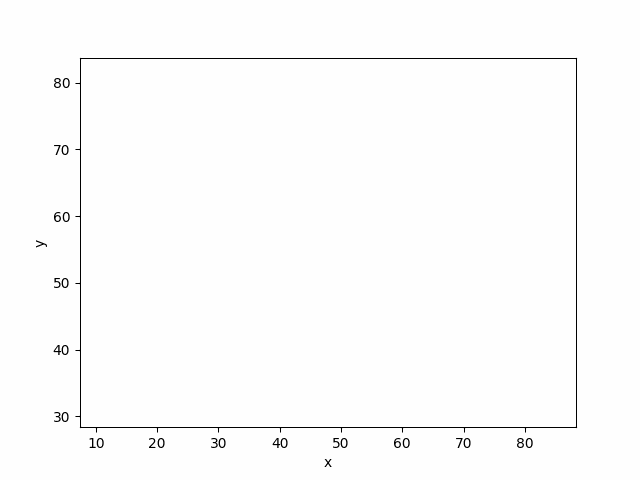

In [25]:
print(t)
vis = find_intersections_with_visualization(t)
vis.show_gif()

In [77]:
t = []
add_sections(t)


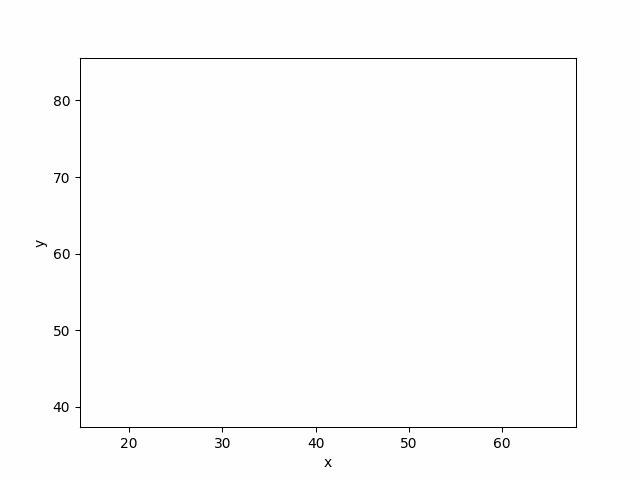

In [78]:
vis = find_intersections_with_visualization(t)
vis.show_gif()

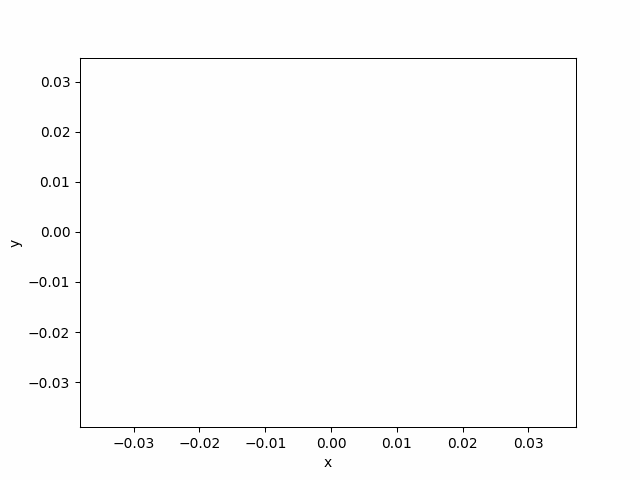

In [73]:
t = [((-0.034729840063279685, 0.019299425704806472), (0.030693547033494514, -0.03327410370695825)), ((-0.02962903361166678, -0.03563317233440923), (0.03379838574317193, 0.028735700214610402)), ((0.01117741800123645, 0.031431778645982955), (0.012064514775429996, -0.032937093903036674)), ((0.02226612767865581, 0.028061680606767267), (0.022709676065752582, -0.03394812331480138)), ((-0.024306452966505486, -0.015412584099115098), (-0.017431452966505487, -0.007661358608919019))]
vis = find_intersections_with_visualization(t)
vis.show_gif()


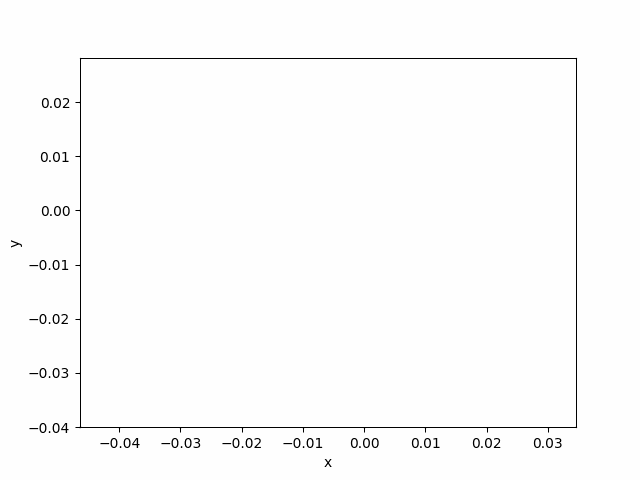

In [74]:
t = [((-0.04271371103102162, 0.007908498446146661), (0.004302418001236444, -0.03691380547542198)), ((-0.03384274328908614, 0.02509599844614667), (0.017165321227042896, -0.02848856037738276)), ((-0.011000001353602261, -0.017367236847970993), (0.030915321227042908, -0.015345178024441575)), ((0.002528224452849351, -0.03185865841659845), (0.02670161154962354, 0.0031903611912447033))]
vis = find_intersections_with_visualization(t)
vis.show_gif()


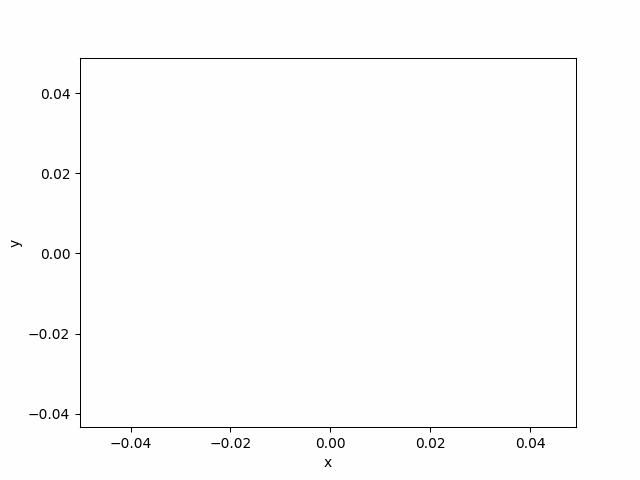

In [ ]:
t = [((0.017165321227042896, 0.04471558346467863), (0.03468548251736549, -0.0014547596725763001)), ((-0.0019072594181183955, 0.030224161896051163), (0.02781048251736548, -0.0065099067313998255)), ((-0.0065645174826345215, 0.002589357974482537), (0.027588708323817088, -0.011228043986301783)), ((-0.003903227160053882, -0.0294265733980665), (0.028697579291559028, -0.020664318496105713)), ((-0.024306452966505486, -0.0122390733980665), (0.002971772839946124, -0.017631230260811592)), ((-0.020536291676182906, 0.0234839658176198), (0.002528224452849351, 0.010340583464678615)), ((-0.0327338723213442, -0.02875255379022336), (0.0009758050980106375, -0.03818882830002729)), ((-0.04271371103102162, -0.003813828300027272), (-0.018096775547150654, -0.00010672045689001652)), ((-0.04559677554715065, 0.036290338366639405), (-0.024306452966505486, 0.011688622680364885)), ((0.02226612767865581, -0.03919985771179199), (0.044665321227042906, -0.01965328908434101))]
vis = find_intersections_with_visualization(t)
vis.show_gif()


### Czy konieczne były zmiany w strukturze zdarzeń. Jeśli tak, to jakie? Czy w przypadku obu algorytmów konieczne są takie same struktury zdarzeń?
### Odpowiedź uzasadnij. 

Odpowiedź here

### Jak obsługiwane są zdarzenia początku odcinka, końca odcinka i przecięcia odcinków z uwzględnianiem wybranych struktur danych?

Odpowiedź here

### Samemu zaprojektuj test, który uwzględnia taki układ odcinków, przy którym pewne przecięcia będą wykrywane więcej niż jeden raz

In [81]:
testing_sections = [[(22.580645161290317, 82.57575757575759), (70.56451612903226, 25.487012987012992)], [(24.79838709677419, 30.627705627705634), (65.9274193548387, 82.03463203463205)], [(23.790322580645157, 56.87229437229438), (35.28225806451613, 57.68398268398269)], [(52.41935483870968, 56.601731601731615), (84.4758064516129, 57.95454545454547)], [(56.45161290322581, 85.2813852813853), (74.59677419354838, 50.64935064935065)], [(60.685483870967744, 52.54329004329006), (80.24193548387096, 79.59956709956711)]]
vis = Visualizer()
vis.add_line_segment(testing_sections)
vis.show()

In [ ]:
# Czy Twój program uwzględnia powyższy przypadek? Jeśli tak, to jak? 

Zanim doda nowy event sprawdza czy już nie było takiego przecięcia wcześniej 

### Zadanie dodatkowe
Zaimplementuj inną strukturę stanu. Opisz ją w sprawozdaniu. Porównaj efektywność algorytmu dla obu struktur robiąc testy na odpowiednio dużych zestawach odcinków.